In [2]:
import numpy
import os
import sys
import tensorflow as tf

import datasets

In [3]:
collection_directory = 'images/coll_28_28_20000'

In [4]:
data_sets = datasets.read_data_sets(collection_directory)

Extracting 16000 images and labels from images/coll_28_28_20000/train/...
Extracting 4000 images and labels from images/coll_28_28_20000/test/...


In [5]:
# should be floats, look like [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
print(data_sets.train.labels[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [6]:
print("train examples:", data_sets.train.num_examples)
print("test examples:", data_sets.test.num_examples)

print(data_sets.train.images.shape)
print(data_sets.train.labels.shape)

print("num train examples:", data_sets.train.num_examples)
print("num test examples:", data_sets.test.num_examples)

print("Shape of training image data:", data_sets.train.images.shape)
print("Shape of training label data:", data_sets.train.labels.shape)

assert data_sets.train.images.ndim == 2
assert data_sets.train.labels.ndim == 2

assert data_sets.train.images.shape[1:] == data_sets.test.images.shape[1:]
assert data_sets.train.labels.shape[1:] == data_sets.test.labels.shape[1:]

train examples: 16000
test examples: 4000
(16000, 784)
(16000, 10)
num train examples: 16000
num test examples: 4000
Shape of training image data: (16000, 784)
Shape of training label data: (16000, 10)


In [7]:
edge_labels = data_sets.train.labels.shape[1]
print(edge_labels)

10


In [8]:
def get_image_index_with_num_edges(labels_array, num_edges):
    assert 3 <= num_edges <= 9
    for index in range(labels_array.shape[0]):
        if labels_array[index][num_edges] == 1.0:
            return index
        

In [9]:
triangle_index = get_image_index_with_num_edges(data_sets.train.labels, 3)
square_index = get_image_index_with_num_edges(data_sets.train.labels, 4)


example_image_index = triangle_index
an_image = data_sets.train.images[example_image_index]
values = []
for y in range(28):
    print()
    for x in range(28):
        value = an_image[x + 28*y]
        values.append(value)
        if value > 0:
            print("1", end="")
        else:
            print("0", end="")
print("\nThe label array for this image is:", data_sets.train.labels[example_image_index])


0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000011110000000000000000000
0000011111111100000000000000
0000001111111000000000000000
0000001111110000000000000000
0000000111100000000000000000
0000000111100000000000000000
0000000011000000000000000000
0000000010000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
0000000000000000000000000000
The label array for this image is: [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


/Users/dansilberman/.virtualenvs/polygoggles/lib/python3.5/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


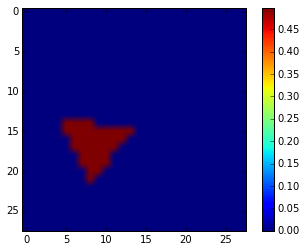

In [10]:
# unflatten an image and show with matplotlib
unflattened = an_image.reshape(28, 28)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(unflattened)
plt.colorbar()

In [9]:
print(values)
print(example_image_index)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.49803925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [10]:
sess = tf.InteractiveSession()

In [11]:
edge_labels = data_sets.train.labels.shape[1] # number of different possible output labels

image_flat_size = data_sets.train.images.shape[1]
assert image_flat_size == data_sets.train.original_image_width * data_sets.train.original_image_height

print("Number of allowed num_edges (ie, size of output vector):", edge_labels)
print("Total image flat size (width * height):", image_flat_size) 

Number of allowed num_edges (ie, size of output vector): 10
Total image flat size (width * height): 784


In [12]:
x = tf.placeholder(tf.float32, [None, image_flat_size])
print(x)
W = tf.Variable(tf.zeros([image_flat_size, edge_labels]))
print(W)
b = tf.Variable(tf.zeros([edge_labels]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)


In [13]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, edge_labels])
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [14]:
# Train
tf.initialize_all_variables().run()
for i in range(1000):
    batch_xs, batch_ys = data_sets.train.next_batch(100)
    train_step.run({x: batch_xs, y_: batch_ys})

In [15]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval({ x: data_sets.test.images, y_: data_sets.test.labels}))

1.0
